In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [3]:
print("Train images shape: ", X_train.shape)
print("Train labels shape: ", Y_train.shape)

print("Test images shape: ", X_test.shape)
print("Test labels shape: ", Y_test.shape)

Train images shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test images shape:  (10000, 28, 28)
Test labels shape:  (10000,)


#Visualising some sample of  X_train

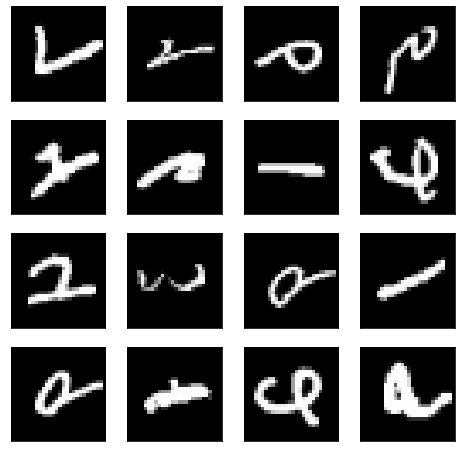

In [21]:
plt.figure(figsize=(8,8))
random_num = np.random.randint(0, 13439, size = 16)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[random_num[i]].reshape(28,28).T,"gray")
    #plt.xlabel(int(Y_train[random_num[i]][0])+1)

<h1>Scailing dataset</h1>

In [5]:
X_train= X_train/255
X_test=X_test/255

<h1>Artificial Neural Network</h1>

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,Y_train,epochs=30)

2022-06-10 16:43:36.635821: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-10 16:43:36.635876: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (muzammil-Latitude-7480): /proc/driver/nvidia/version does not exist
2022-06-10 16:43:36.636825: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3544 - accuracy: 0.9089
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1314 - accuracy: 0.9610
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0893 - accuracy: 0.9730
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0649 - accuracy: 0.9798
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0514 - accuracy: 0.9845
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0389 - accuracy: 0.9887
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0332 - accuracy: 0.9898
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0256 - accuracy: 0.9930
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.9937
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

<h1>Accuracy</h1>

In [7]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9795


[0.09829702228307724, 0.9794999957084656]

In [8]:
Y_predicted= model.predict(X_test)
Y_predicted

array([[3.3736198e-11, 1.6510116e-08, 9.4777031e-10, ..., 9.9999988e-01,
        1.3927104e-10, 2.7251280e-08],
       [7.9932583e-10, 2.3019255e-07, 9.9999976e-01, ..., 9.4107100e-10,
        5.1812121e-10, 7.4073878e-14],
       [2.6526148e-10, 9.9999928e-01, 1.7606725e-08, ..., 3.1752444e-07,
        9.0238245e-08, 1.1644643e-11],
       ...,
       [5.5057266e-13, 4.4437147e-09, 2.6607688e-11, ..., 6.0176117e-09,
        3.6199208e-10, 1.8413084e-06],
       [1.1428611e-12, 9.4743501e-12, 1.5698599e-12, ..., 2.6669210e-11,
        9.8810467e-08, 4.5442691e-10],
       [4.7138826e-08, 1.3040110e-09, 4.5587609e-09, ..., 8.8840746e-13,
        1.0714458e-09, 9.8221769e-12]], dtype=float32)

<h1>Confusion Matrix</h1>

In [9]:
y_predicted_labels=[np.argmax(i) for i in Y_predicted]
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 5,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [10]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test,y_predicted_labels)
cm

array([[ 969,    0,    0,    0,    0,    4,    1,    1,    2,    3],
       [   0, 1123,    3,    1,    0,    1,    2,    1,    4,    0],
       [   4,    3, 1007,    2,    3,    0,    2,    6,    5,    0],
       [   0,    0,    2,  992,    0,    8,    0,    4,    1,    3],
       [   1,    0,    2,    0,  962,    0,    4,    1,    2,   10],
       [   1,    0,    0,    9,    2,  873,    3,    0,    3,    1],
       [   4,    2,    1,    1,    7,    5,  937,    0,    1,    0],
       [   0,    6,    7,    2,    0,    1,    0, 1003,    3,    6],
       [   6,    0,    3,    7,    3,    3,    3,    2,  941,    6],
       [   0,    2,    0,    0,    7,    7,    0,    2,    3,  988]])

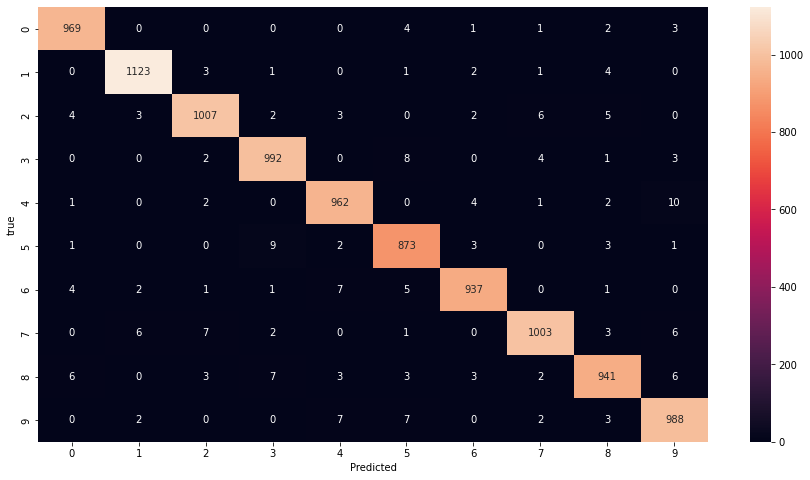

In [11]:
import seaborn as sn
plt.figure(figsize=(15,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

In [12]:
len(X_train)

60000

In [13]:
len(X_test)

10000

<h1>Some Predictions</h1>

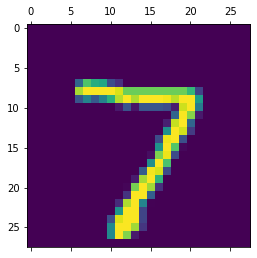

In [17]:
plt.matshow(X_test[0])

In [18]:
y_predicted_labels[0]

7

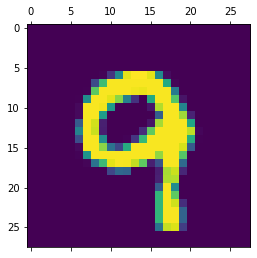

In [19]:
plt.matshow(X_test[99])

In [20]:
y_predicted_labels[99]

9